In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [17]:
img = cv2.imread("images/2.jpg")

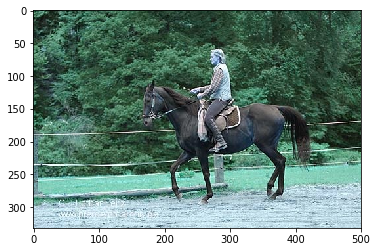

In [18]:
plt.imshow(img)

In [7]:
img.shape

(332, 500, 3)

In [8]:
img2 = img.reshape(img.shape[0]*img.shape[1],img.shape[2])

In [9]:
def euclidian(A,B):
    return np.sqrt(sum(list(map(lambda x,y:(x-y)**2,A,B))))  

In [10]:
def k_mean(data,iteration,k):
    init_centroid = data[np.random.randint(0,len(data)-1,size=k)]
    centroid_collection = []
    centroid_collection.append(init_centroid)
    belong = np.zeros([len(data),1])
    for t in range(iteration):
        for num_instance,instance in enumerate(data):
                temp_dist = np.zeros([k,1])
                for centroid_num,centroid in enumerate(init_centroid):
                    temp_dist[centroid_num] = euclidian(centroid,instance)
                belong[num_instance] = np.argmin(temp_dist)
                temp_centroid = np.zeros(init_centroid.shape)
        for index in range(len(init_centroid)):
                cluster = [i for i in range(len(belong)) if belong[i] == index]
                mean_centroid = np.mean(data[cluster],axis=0)
                temp_centroid[index,:] = mean_centroid
        centroid_collection.append(temp_centroid)
        init_centroid = temp_centroid
    return init_centroid,belong,centroid_collection



                        
                

In [11]:
n_clusters = 3
centroid,labels,centroids_collection = k_mean(img2,10,n_clusters)
#centroid = np.array(centroid)

/home/deadlock20000/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [12]:
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]])

In [13]:
img3 = img2
for index in range(n_clusters):
    for i,label in enumerate(labels):
        if label == index:
            img3[i] = centroid[index] 


In [14]:
img3 = img3.reshape(img.shape[0], img.shape[1], img.shape[2])

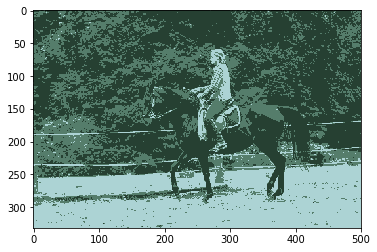

In [15]:
plt.imshow(img3)

In [16]:
cv2.imwrite("images/imgM_cluster{}.jpg".format(n_clusters),img3)

True